<a href="https://colab.research.google.com/github/nalymugwe/DataCquence-Capstone-Project/blob/main/Capstone_Project_Part_A_Features_of_Trending_YouTube_Videos_in_USA%2C_India%2C_Japan%2C_South_Korea%2C_Mexico_%26_Brazil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#check working directory
!pwd

/content/gdrive/My Drive/Data Science/Data


In [9]:
#Mount Colab onto Google Drive for easier extraction of files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
#Import the operating system and confirm the list of files.
import os
os.chdir('/content/gdrive/MyDrive/Data Science/Data')
!ls

 01_heights_weights_genders.csv
 BR_youtube_trending_data.csv
 CA_youtube_trending_data.csv
 DE_youtube_trending_data.csv
 FR_youtube_trending_data.csv
 GB_youtube_trending_data.csv
 IN_youtube_trending_data.csv
 JP_youtube_trending_data.csv
 KR_youtube_trending_data.csv
 ks-projects-201801.csv
'Measurement and analysis of Youtube Trending Videos.gdoc'
 MX_youtube_trending_data.csv
'Project ideas to tackle.gdoc'
 RU_youtube_trending_data.csv
 services_annual_dataset.zip
 US_youtube_trending_data.csv
 WineKMC.csv
 YouTubedata_20210106_220013B.csv
 Youtubedata_20210109_213012A.csv
'YoutubeData.csv - Trending Videos.zip'
'YouTube Project Files.zip'


In [11]:
#import all libraries needed

import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob
import seaborn as sns


In [12]:
#Import all datasets
USA_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/US_youtube_trending_data.csv')
India_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/IN_youtube_trending_data.csv')
Japan_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/JP_youtube_trending_data.csv')
SouthKorea_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/KR_youtube_trending_data.csv')
Mexico_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/MX_youtube_trending_data.csv')
Brazil_data = pd.read_csv('/content/gdrive/MyDrive/Data Science/Data/BR_youtube_trending_data.csv')

In [13]:
#Merge all data into one dataframe
Frames = [USA_data, India_data, SouthKorea_data, Mexico_data, Japan_data, Brazil_data]
All_data = pd.concat(Frames, keys=["USA", "India", "SouthKorea", "Mexico", "Japan", "Brazil"], axis=0).reset_index().rename(columns={'level_0':'country'})
All_data.head()

,country,level_1,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,USA,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,USA,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,USA,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,USA,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,USA,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [14]:
#Drop columns not needed

Data = All_data.drop(columns =['level_1', 'comments_disabled', 'ratings_disabled', 'thumbnail_link'], axis = 1) 
Data.head()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...


In [15]:
#Separate the date from the time from publishedAt column

df = Data

df['publish_date'] = pd.to_datetime(df['publishedAt']).dt.date
df['publish_time'] = pd.to_datetime(df['publishedAt']).dt.time
df.head()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05


In [16]:
#Separate the date from the time from trending_date column

df2 = df

df2['trend_date'] = pd.to_datetime(df2['trending_date']).dt.date
df2['trend_time'] = pd.to_datetime(df2['trending_date']).dt.time
df2.head()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time,trend_date,trend_time
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14,2020-08-12,00:00:00
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55,2020-08-12,00:00:00
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00


In [17]:
#Drop publishedAt, channelId, Dates, Times and trending_date columns

Data2 = df2.drop(columns =['publishedAt', 'trending_date', 'channelId'], axis = 1) 
Data2.head()

,country,video_id,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time,trend_date,trend_time
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14,2020-08-12,00:00:00
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55,2020-08-12,00:00:00
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00


In [18]:
#Description of the numerical columns

pd.options.display.float_format = "{:.2f}".format #to chnage the format of the results to see the full value
Data2.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,122801.00,122801.00,122801.00,122801.00,122801.00
mean,19.06,2034125.81,130090.73,4549.07,15760.43
std,6.90,7480688.57,550037.99,104581.04,158064.94
min,1.00,0.00,0.00,0.00,0.00
25%,10.00,268865.00,8421.00,199.00,684.00
50%,22.00,620621.00,24980.00,551.00,1886.00
75%,24.00,1514923.00,80823.00,1771.00,5629.00
max,29.00,262319276.00,16254791.00,12341474.00,6303708.00


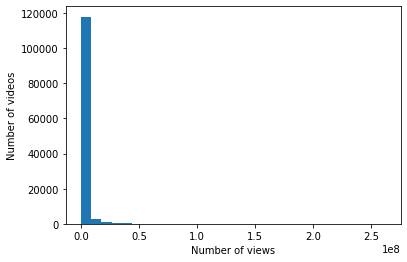

In [19]:
#Plot histogram to view distribution of the count of views

plt.hist(Data2['view_count'], bins=30)
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.show()

In [20]:
#Check the percentage of views with less than 2.5 million views

Data2[Data2['view_count'] < 2500000]['view_count'].count() / Data2['view_count'].count() * 100

84.80875562902582

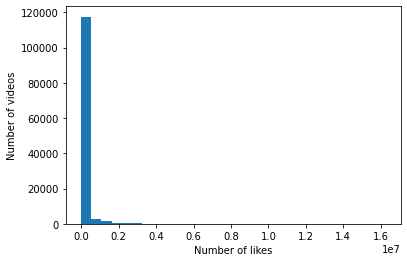

In [21]:
#Plot histogram to view distribution of the number of likes

plt.hist(Data2['likes'], bins=30)
plt.xlabel('Number of likes')
plt.ylabel('Number of videos')
plt.show()

In [22]:
#Check the percentage of likes with less than 250000 views

Data2[Data2['likes'] < 250000]['likes'].count() / Data2['likes'].count() * 100

90.17516144005342

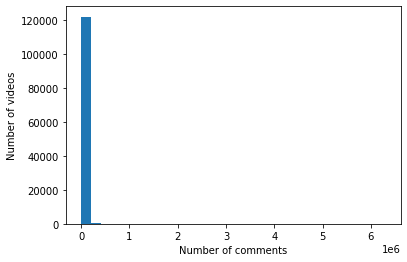

In [23]:
#Plot histogram to view distribution of the number of comments

plt.hist(Data2['comment_count'], bins=30)
plt.xlabel('Number of comments')
plt.ylabel('Number of videos')
plt.show()

In [24]:
#Check the percentage of likes with less than 125000 comments

Data2[Data2['comment_count'] < 125000]['comment_count'].count() / Data2['comment_count'].count() * 100

98.63274729033151

country
Brazil        21194
India         20057
Japan         21197
Mexico        21000
SouthKorea    18155
USA           21198
Name: title, dtype: int64

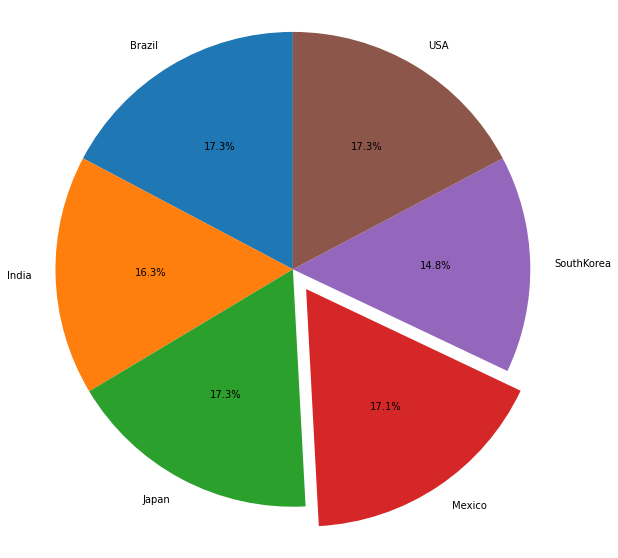

In [25]:
#compare the number of trending videos per country

labels = Data2.groupby(['country']).count().index
sizes = Data2.groupby(['country']).count()['title']
explode = (0, 0, 0, 0.1, 0, 0)  

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  
sizes

<Figure size 432x288 with 0 Axes>

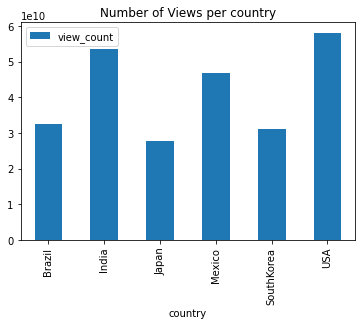

In [26]:
#Get the number of views for each country

views_per_country=Data2.groupby(by=['country'],as_index=False).view_count.sum()
plt.figure()
views_per_country.plot.bar('country', 'view_count')
plt.title('Number of Views per country')
plt.show()

<Figure size 432x288 with 0 Axes>

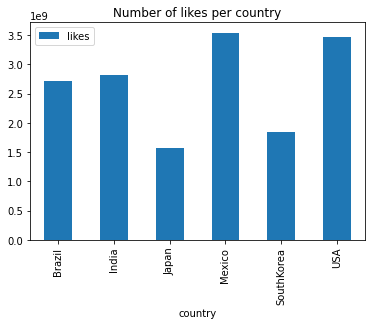

In [27]:
#Get the number of likes for each country

likes_per_country=Data2.groupby(by=['country'],as_index=False).likes.sum()
plt.figure()
likes_per_country.plot.bar('country', 'likes')
plt.title('Number of likes per country')
plt.show()

<Figure size 432x288 with 0 Axes>

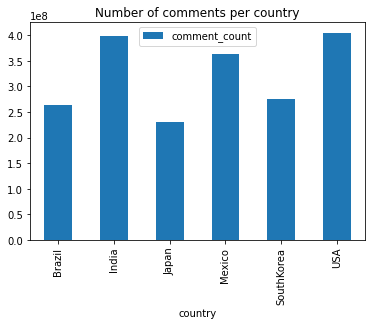

In [28]:
#Get the number of comment count for each country

commentcount_per_country=Data2.groupby(by=['country'],as_index=False).comment_count.sum()
plt.figure()
commentcount_per_country.plot.bar('country', 'comment_count')
plt.title('Number of comments per country')
plt.show()

<Figure size 432x288 with 0 Axes>

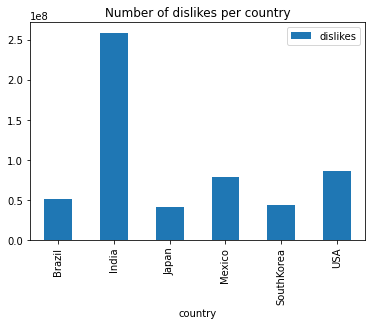

In [29]:
#Get the number of dislikes for each country

dislikes_per_country=Data2.groupby(by=['country'],as_index=False).dislikes.sum()
plt.figure()
dislikes_per_country.plot.bar('country', 'dislikes')
plt.title('Number of dislikes per country')
plt.show()

In [30]:
#Count the tag words

Data3 = Data2
Data3['tag_count'] = df['tags'].str.len()
Data3.head()

,country,video_id,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time,trend_date,trend_time,tag_count
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14,2020-08-12,00:00:00,143
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00,448
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00,384
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55,2020-08-12,00:00:00,250
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00,415


In [31]:
corr = Data3.corr()
print(corr)

               categoryId  view_count  ...  comment_count  tag_count
categoryId           1.00       -0.12  ...          -0.08      -0.02
view_count          -0.12        1.00  ...           0.83       0.04
likes               -0.14        0.91  ...           0.85       0.00
dislikes            -0.01        0.24  ...           0.22       0.02
comment_count       -0.08        0.83  ...           1.00      -0.01
tag_count           -0.02        0.04  ...          -0.01       1.00

[6 rows x 6 columns]


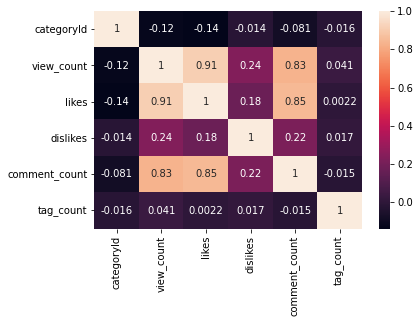

In [32]:
#To help visualize the data
#The lighter the colour the higher the correlation

plt.figure()
sns.heatmap(corr, annot=True);

In [33]:
#Get the difference in trend date from publish date

Data4 = Data3
Data4['difference_in_date'] = abs(Data4['trend_date'] - Data4['publish_date']).dt.days
Data4.head()

,country,video_id,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time,trend_date,trend_time,tag_count,difference_in_date
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14,2020-08-12,00:00:00,143,1
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00,448,1
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00,384,1
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55,2020-08-12,00:00:00,250,1
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00,415,1


<Figure size 432x288 with 0 Axes>

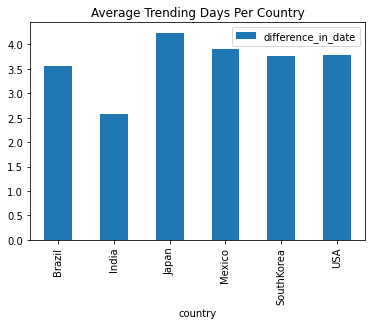

In [34]:
#Get the average number of days a youtube video trends for each country

Average_Trending_Days=Data4.groupby(by=['country'],as_index=False).difference_in_date.mean()
plt.figure()
Average_Trending_Days.plot.bar('country', 'difference_in_date')
plt.title('Average Trending Days Per Country')
plt.show()

In [35]:
#Replace the values of the categoryId with its corresponding name.

Data5 = Data4.replace({'categoryId' :{2 : 'Autos & Vehicles' , 1 : 'Film & Animation', 10 : 'Music', 15 : 'Pets & Animals', 17 : 'Sports', 18 : 'Short Movies', 19 : 'Travel & Events', 20 : 'Gaming', 21 : 'Videoblogging', 22 : 'People & Blogs', 23 : 'Comedy', 24 : 'Entertainment', 25 : 'News & Politics', 26 : 'Howto & Style', 27 : 'Education', 28 : 'Science & Technology', 29 : 'Nonprofits & Activism', 30 : 'Movies', 31 : 'Anime/Animation', 32 : 'Action/Adventure', 33 : 'Classics', 34 : 'Comedy', 35 : 'Documentary', 36 : 'Drama', 37 : 'Family', 38 : 'Foreign', 39 : 'Horror', 40 : 'Sci-Fi/Fantasy', 41 : 'Thriller', 42 : 'Shorts', 43 : 'Shows', 44 : 'Trailers'}})
Data5.head()



,country,video_id,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,description,publish_date,publish_time,trend_date,trend_time,tag_count,difference_in_date
0,USA,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,People & Blogs,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020-08-11,19:20:14,2020-08-12,00:00:00,143,1
1,USA,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,Gaming,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",2020-08-11,17:00:10,2020-08-12,00:00:00,448,1
2,USA,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,jacksepticeye,Entertainment,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,2020-08-11,16:34:06,2020-08-12,00:00:00,384,1
3,USA,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,XXL,Music,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020-08-11,16:38:55,2020-08-12,00:00:00,250,1
4,USA,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,Howto & Style,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,2020-08-11,15:10:05,2020-08-12,00:00:00,415,1


Text(0.5, 1.0, 'Category v/s Trending Duration')

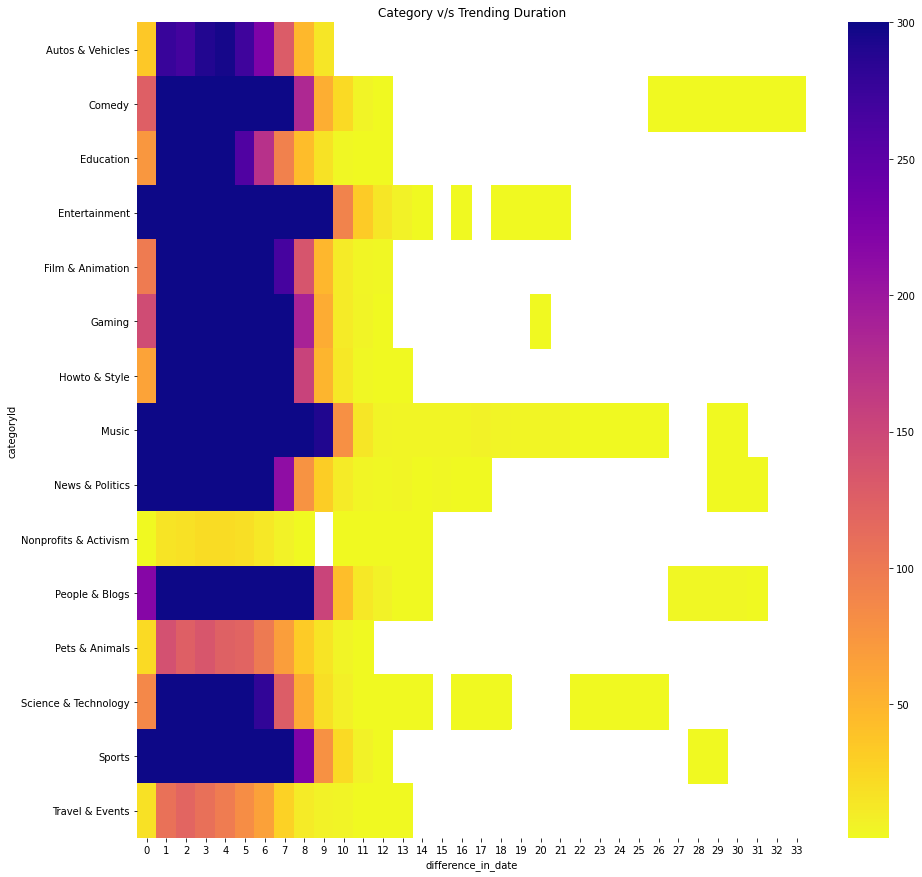

In [36]:
#Compare the trend duration as per the categoryId.

category_trend_duration= Data5.groupby(['categoryId','difference_in_date']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
sns.heatmap(category_trend_duration, cmap='plasma_r')
plt.title("Category v/s Trending Duration")

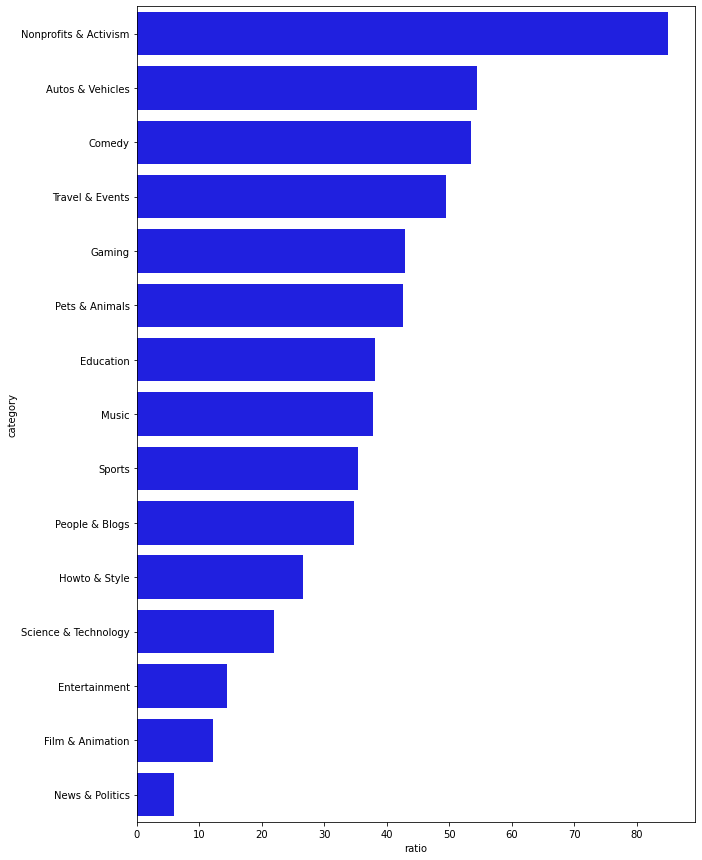

In [37]:
#like-dislikes ratio in different categories

like_dislike_ratio = Data5.groupby('categoryId')['likes'].agg('sum') / Data5.groupby('categoryId')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

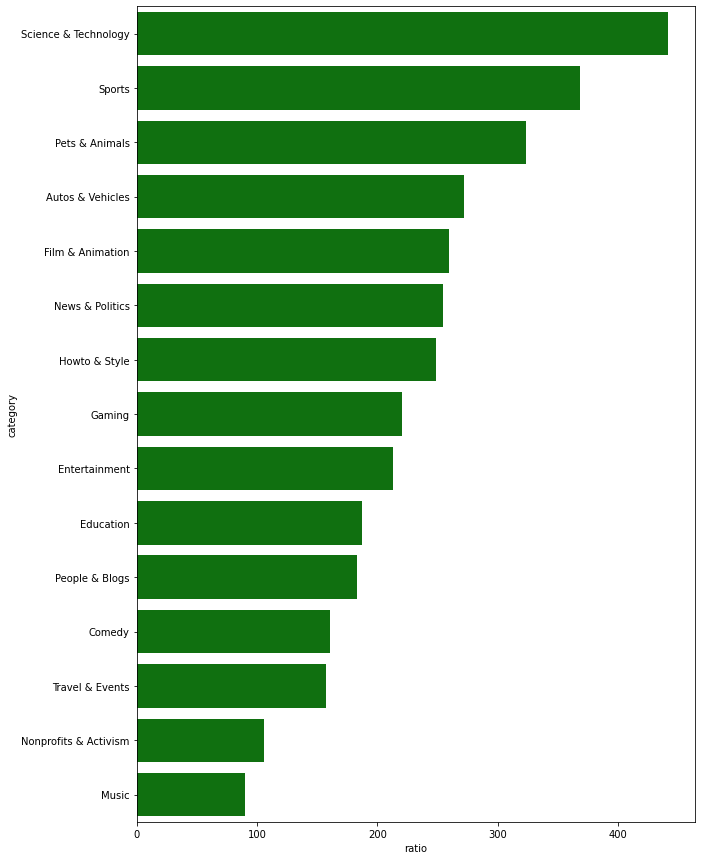

In [38]:
#view-comment ratio in different categories

view_comment_ratio = Data5.groupby('categoryId')['view_count'].agg('sum') / Data5.groupby('categoryId')['comment_count'].agg('sum')
view_comment_ratio = view_comment_ratio.sort_values(ascending=False).reset_index()
view_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_comment_ratio,
            label="View-Comment Ratio", color="g")

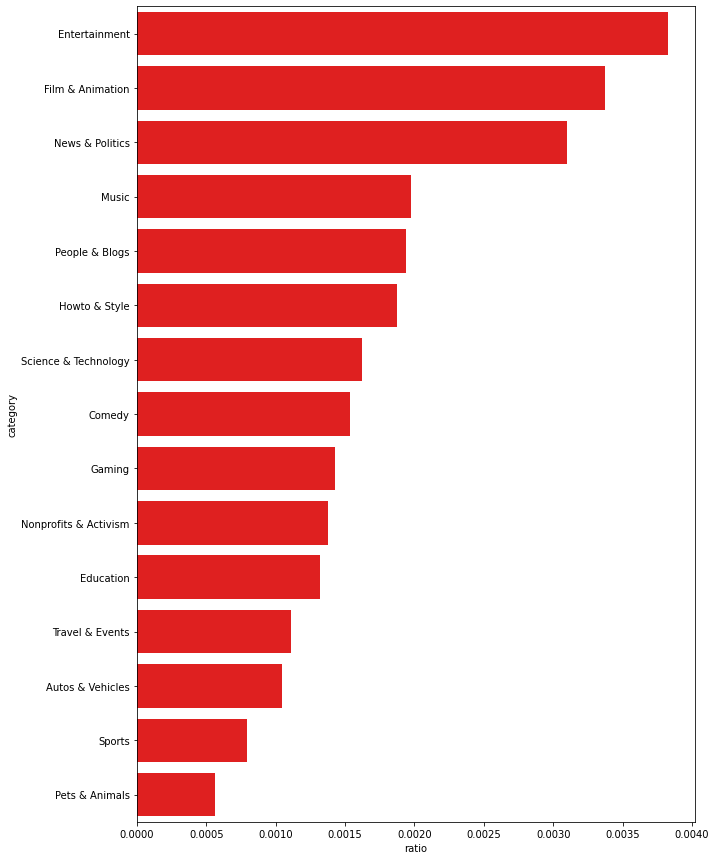

In [39]:
#Dislikes-View ratio in different categories

dislikes_view_ratio = Data5.groupby('categoryId')['dislikes'].agg('sum') / Data5.groupby('categoryId')['view_count'].agg('sum')
dislikes_view_ratio = dislikes_view_ratio.sort_values(ascending=False).reset_index()
dislikes_view_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=dislikes_view_ratio,
            label="View-Comment Ratio", color="r")

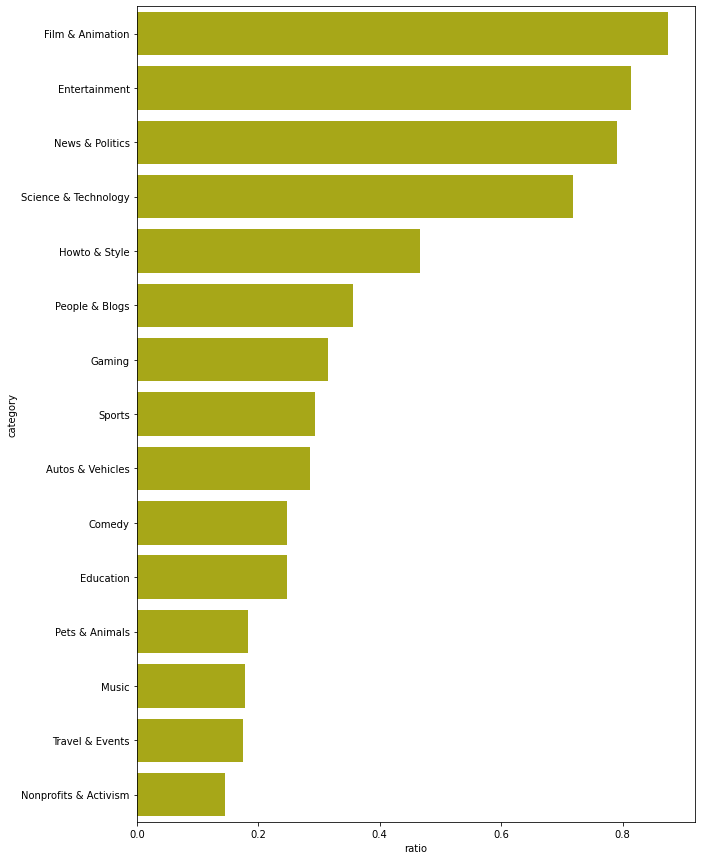

In [40]:
#Dislikes-Comment ratio in different categories

dislikes_comment_ratio = Data5.groupby('categoryId')['dislikes'].agg('sum') / Data5.groupby('categoryId')['comment_count'].agg('sum')
dislikes_comment_ratio = dislikes_comment_ratio.sort_values(ascending=False).reset_index()
dislikes_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=dislikes_comment_ratio,
            label="Dislikes-Comment Ratio", color="y")

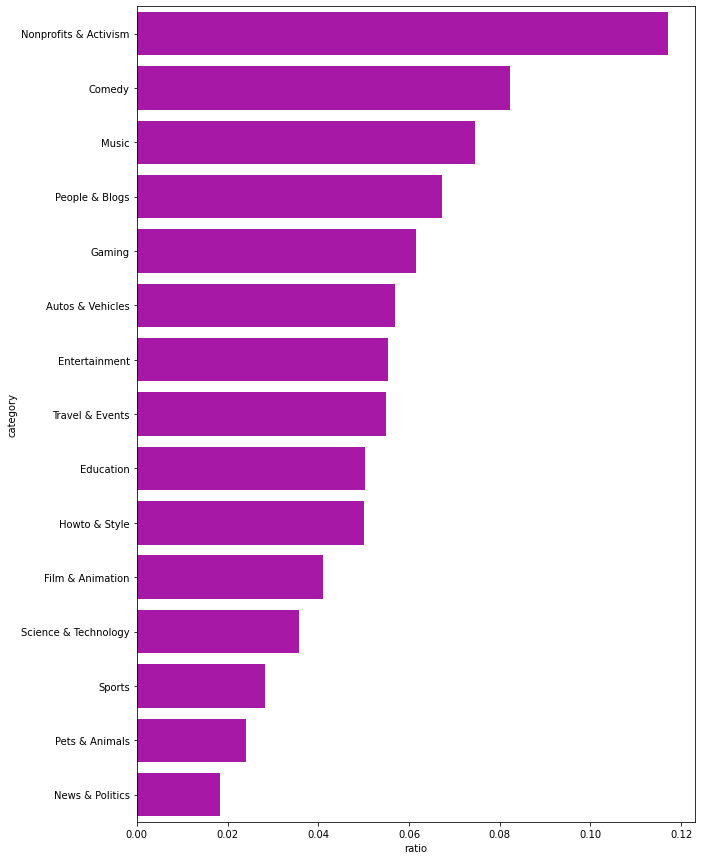

In [41]:
#Likes-Views Ratio in different categories

likes_views_ratio = Data5.groupby('categoryId')['likes'].agg('sum') / Data5.groupby('categoryId')['view_count'].agg('sum')
likes_views_ratio = likes_views_ratio.sort_values(ascending=False).reset_index()
likes_views_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=likes_views_ratio,
            label="Likes-View Ratio", color="m")


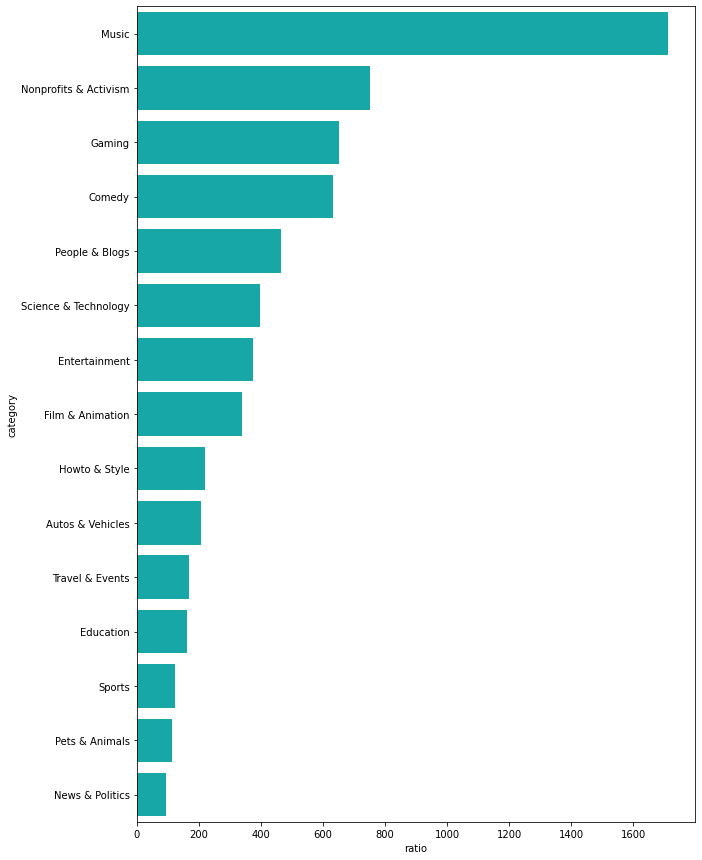

In [42]:
#like-tagcount ratio in different categories

like_tagcount_ratio = Data5.groupby('categoryId')['likes'].agg('sum') / Data5.groupby('categoryId')['tag_count'].agg('sum')
like_tagcount_ratio = like_tagcount_ratio.sort_values(ascending=False).reset_index()
like_tagcount_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_tagcount_ratio,
            label="Likes-Tagcount Ratio", color="c")

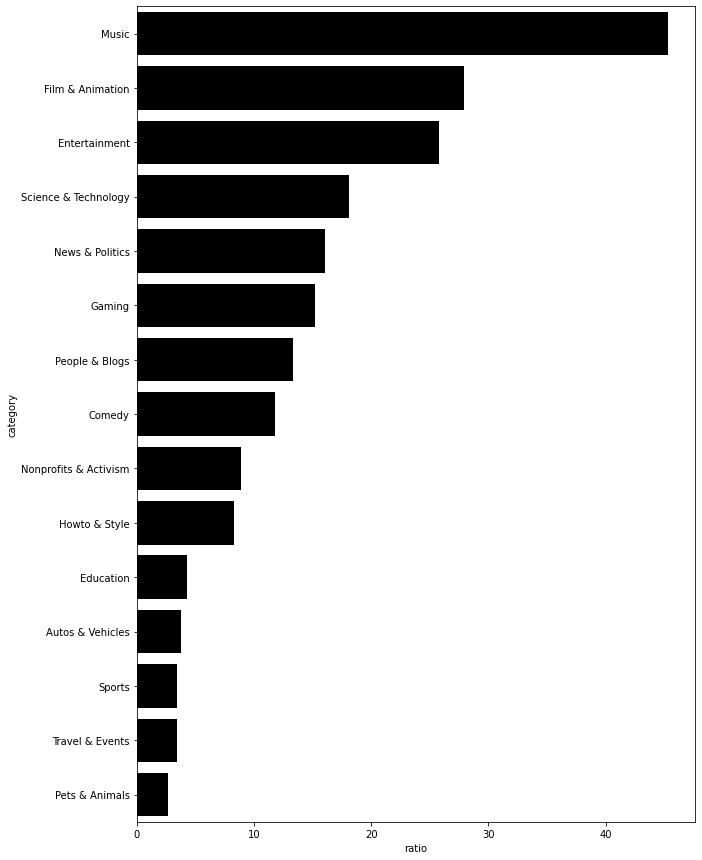

In [43]:
#dislike-tagcount ratio in different categories

dislike_tagcount_ratio = Data5.groupby('categoryId')['dislikes'].agg('sum') / Data5.groupby('categoryId')['tag_count'].agg('sum')
dislike_tagcount_ratio = dislike_tagcount_ratio.sort_values(ascending=False).reset_index()
dislike_tagcount_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=dislike_tagcount_ratio,
            label="Dislikes-Tagcount Ratio", color="k")